Priyanka Gorentla created on 02/24/2023
Data Analytics Project 7 task 3

## 10.16 Intro to Data Science: Time Series and Simple Linear Regression 

In [26]:
# Enable matplotlib
%matplotlib inline

In [27]:
## We store each Fahrenheit/Celsius pair as a tuple in temps:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

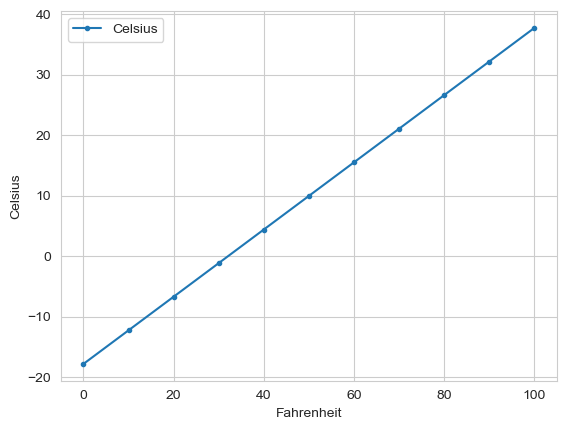

In [28]:
## use plot method to display the linear relationship between the Fahrenheit and Celsius temperatures
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')
    

## Loading the Average High Temperatures into a DataFrame

In [29]:
## Load 
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [30]:
## Display
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [32]:
## Display
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Cleaning the Data

In [33]:
## Renaming columns
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [34]:
nyc.Date.dtype

dtype('int64')

In [35]:
 nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Calculating Basic Descriptive Statistics for the Dataset

In [36]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Forecasting Future January Average High Temperatures

In [37]:
 from scipy import stats

In [38]:
linear_regression = stats.linregress(x=nyc.Date,
                                         y=nyc.Temperature)

In [39]:
linear_regression.slope

0.014771361132966163

In [40]:
linear_regression.intercept

8.694993233674289

In [41]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [42]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [43]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

## Plotting the Average High Temperatures and a Regression Line

In [44]:
 import seaborn as sns

In [45]:
sns.set_style('whitegrid')

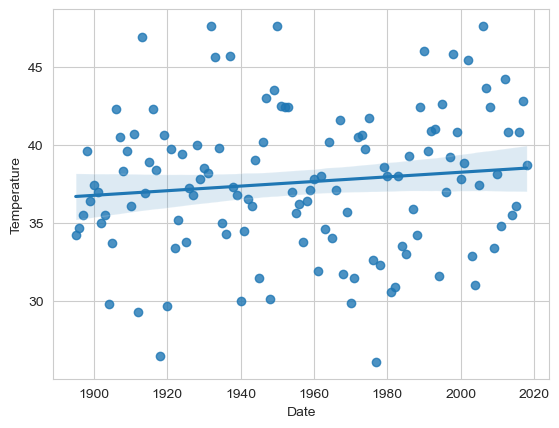

In [50]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

(10.0, 70.0)

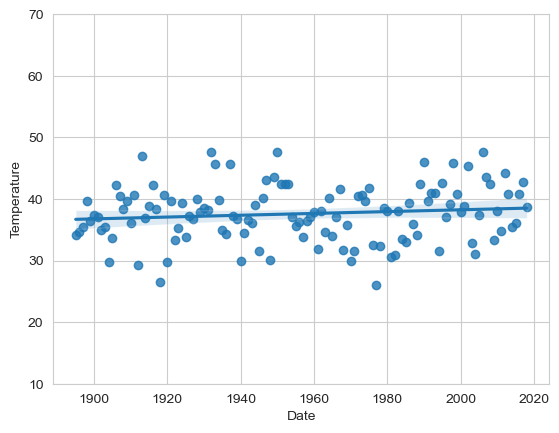

In [49]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Classification with k-Nearest Neighbors and the Digits Dataset-Loading the Dataset

In [51]:
## load_digits function from the sklearn.datasets module returns a scikit-learn Bunch object
from sklearn.datasets import load_digits

In [52]:
digits = load_digits()

In [53]:
## Displaying the Description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [54]:
## Checking the Sample and Target Sizes
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [55]:
digits.data.shape

(1797, 64)

In [56]:
digits.target.shape

(1797,)

In [57]:
## A Sample Digit Image
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [58]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [59]:
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [60]:
digits.target[22]

2

## 15.4 Case Study-Time Series and Simple Linear Regression 

## Loading the Average High Temperatures into a DataFrame

In [67]:
import pandas as pd
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Splitting the Data for Training and Testing

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
    random_state=11)


In [70]:
X_train.shape

(93, 1)

In [71]:
X_test.shape

(31, 1)

## Training the Model

In [74]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [75]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [76]:
# The slope is stored in the estimator’s coeff_ attribute
linear_regression.coef_

array([0.01939167])

In [77]:
# The intercept is stored in the estimator’s intercept_ attribute
linear_regression.intercept_

-0.30779820252656265

## Testing the Model

In [78]:
predicted = linear_regression.predict(X_test)

In [79]:
expected = y_test

In [81]:
## displaying the predicted and expected values for every fifth element
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


## Predicting Future Temperatures and Estimating Past Temperatures

In [82]:
 predict = (lambda x: linear_regression.coef_ * x +
            linear_regression.intercept_)

In [83]:
##2019 temp prediction
predict(2019)

array([38.84399018])

In [84]:
##1890 temp estimaion
predict(1890)

array([36.34246432])

In [85]:
##2026 temp prediction 
predict(2026)

array([38.97973189])

## Visualizing the Dataset with the Regression Line

In [86]:
import seaborn as sns

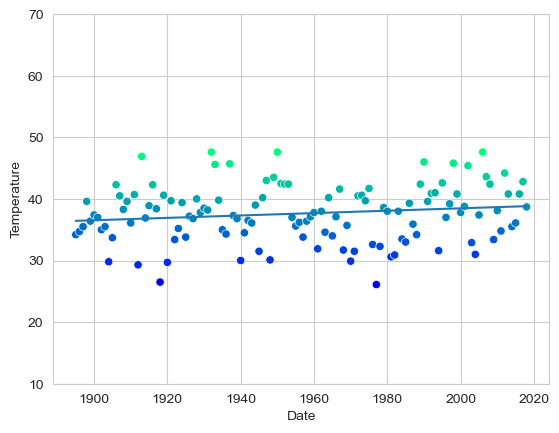

In [95]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
import matplotlib.pyplot as plt
line = plt.plot(x, y)